<a href="https://colab.research.google.com/github/OmdenaAI/SanJoseUSAChapter_ChronicDiseaseRisk/blob/Lab_data/EDALabData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data
lab_data = pd.read_csv('/content/Merged_Lab_Data.csv')

In [3]:
#info about the data
lab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13772 entries, 0 to 13771
Columns: 300 entries, SEQN to LBDTCSI
dtypes: float64(300)
memory usage: 31.5 MB


In [4]:
#See the head of the data
lab_data.head()

,SEQN,LBXHSCRP,LBDHRPLC,LBXHBS,WTSAFPRP,LBXGLU,LBDGLUSI,WTSAFPRP_1,LBXIN,LBDINSI,...,LBDIHGSI,LBDIHGLC,LBXBGE,LBDBGESI,LBDBGELC,LBXBGM,LBDBGMSI,LBDBGMLC,LBXTC,LBDTCSI
0,109263.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,0.11,1.000000e+00,2.0,27533.174559,97.0,5.38,27533.174559,6.05,36.3,...,0.75,1.000000e+00,0.05,0.25,1.0,0.18,0.9,1.0,166.0,4.29
2,109265.0,0.31,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.75,1.000000e+00,0.05,0.25,1.0,0.18,0.9,1.0,NaN,NaN
3,109266.0,0.72,5.397605e-79,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.20,5.397605e-79,0.05,0.25,1.0,0.18,0.9,1.0,195.0,5.04
4,109269.0,0.73,5.397605e-79,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.75,1.000000e+00,0.05,0.25,1.0,0.18,0.9,1.0,NaN,NaN


In [5]:
#see the tail or the end of the data
lab_data.tail()

,SEQN,LBXHSCRP,LBDHRPLC,LBXHBS,WTSAFPRP,LBXGLU,LBDGLUSI,WTSAFPRP_1,LBXIN,LBDINSI,...,LBDIHGSI,LBDIHGLC,LBXBGE,LBDBGESI,LBDBGELC,LBXBGM,LBDBGMSI,LBDBGMLC,LBXTC,LBDTCSI
13767,124818.0,2.04,5.397605e-79,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.75,1.000000e+00,0.05,0.25,1.0,0.61,3.04,5.397605e-79,234.0,6.05
13768,124819.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13769,124820.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.75,1.000000e+00,0.05,0.25,1.0,0.18,0.90,1.000000e+00,179.0,4.63
13770,124821.0,0.51,5.397605e-79,2.0,10704.467871,125.0,6.94,10704.467871,7.75,46.5,...,1.30,5.397605e-79,0.05,0.25,1.0,0.67,3.34,5.397605e-79,155.0,4.01
13771,124822.0,0.82,5.397605e-79,2.0,36585.328133,96.0,5.33,36585.328133,4.45,26.7,...,2.00,5.397605e-79,0.05,0.25,1.0,2.33,11.63,5.397605e-79,171.0,4.42


In [6]:
#what type to know
lab_data.dtypes

,0
SEQN,float64
LBXHSCRP,float64
LBDHRPLC,float64
LBXHBS,float64
WTSAFPRP,float64
...,...
LBXBGM,float64
LBDBGMSI,float64
LBDBGMLC,float64
LBXTC,float64


In [7]:
#Knowing the unique data for every variable
lab_data.nunique()

,0
SEQN,13772
LBXHSCRP,1513
LBDHRPLC,2
LBXHBS,2
WTSAFPRP,4351
...,...
LBXBGM,702
LBDBGMSI,702
LBDBGMLC,2
LBXTC,272


In [8]:
#Finding null data
lab_data.isnull().sum()

,0
SEQN,0
LBXHSCRP,2158
LBDHRPLC,2158
LBXHBS,2162
WTSAFPRP,8682
...,...
LBXBGM,1743
LBDBGMSI,1743
LBDBGMLC,1743
LBXTC,2944


In [9]:
# Calculate the percentage of missing values for each column
missing_percentage = (lab_data.isnull().sum() / len(lab_data)) * 100

# Filter columns where the percentage of missing values is greater than 70
columns_with_high_missing = missing_percentage[missing_percentage > 70]

columns_with_high_missing

,0
WTSBAPRP,74.876561
LBXPFDE,77.693872
LBDPFDEL,77.693872
LBXPFHS,77.693872
LBDPFHSL,77.693872
LBXMPAH,77.693872
LBDMPAHL,77.693872
LBXPFNA,77.693872
LBDPFNAL,77.693872
LBXPFUA,77.693872


In [10]:
col_miss_high_missing_ind = columns_with_high_missing.index

In [11]:
# Filter columns where the percentage of missing values is lesser than 70
columns_with_low_missing = missing_percentage[missing_percentage > 70]

columns_with_low_missing

,0
WTSBAPRP,74.876561
LBXPFDE,77.693872
LBDPFDEL,77.693872
LBXPFHS,77.693872
LBDPFHSL,77.693872
LBXMPAH,77.693872
LBDMPAHL,77.693872
LBXPFNA,77.693872
LBDPFNAL,77.693872
LBXPFUA,77.693872


1. The laboratoary data has 300 columns and 13771
2. There are many (NaN) values in the data
3. The weight problem percentages is more than 70%
4. The na values have to be dropped

In [12]:
#dropping the higher missing variables
lab_data_dropped = lab_data.drop(col_miss_high_missing_ind,axis=1)
#Yes.

In [13]:
#Checking the missing and uniqueness

lab_data_dropped_uniq = lab_data_dropped.nunique()
lab_data_dropped_uniq

,0
SEQN,13772
LBXHSCRP,1513
LBDHRPLC,2
LBXHBS,2
WTSAFPRP,4351
...,...
LBXBGM,702
LBDBGMSI,702
LBDBGMLC,2
LBXTC,272


In [14]:
#Lets take out the varibales which is coming from the urine labaoratory data as well as taking out the variabes which is not about the cholesterol
lab_data_dropped_new = lab_data_dropped.drop(['URXUMA','URXUMS','URXUCR','URXCRS','URDACT','URDUCRLC','PHQ020','PHQ030','PHQ040','PHQ050','PHQ060','PHAFSTHR','PHAFSTMN','PHDSESN','WTFOLPRP','WTFOLPRP_1'],axis=1)
lab_data_dropped_new

,SEQN,LBXHSCRP,LBDHRPLC,LBXHBS,WTSAFPRP,LBXGLU,LBDGLUSI,WTSAFPRP_1,LBXIN,LBDINSI,...,LBDIHGSI,LBDIHGLC,LBXBGE,LBDBGESI,LBDBGELC,LBXBGM,LBDBGMSI,LBDBGMLC,LBXTC,LBDTCSI
0,109263.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,0.11,1.000000e+00,2.0,27533.174559,97.0,5.38,27533.174559,6.05,36.3,...,0.75,1.000000e+00,0.05,0.25,1.0,0.18,0.90,1.000000e+00,166.0,4.29
2,109265.0,0.31,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.75,1.000000e+00,0.05,0.25,1.0,0.18,0.90,1.000000e+00,NaN,NaN
3,109266.0,0.72,5.397605e-79,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.20,5.397605e-79,0.05,0.25,1.0,0.18,0.90,1.000000e+00,195.0,5.04
4,109269.0,0.73,5.397605e-79,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.75,1.000000e+00,0.05,0.25,1.0,0.18,0.90,1.000000e+00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13767,124818.0,2.04,5.397605e-79,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.75,1.000000e+00,0.05,0.25,1.0,0.61,3.04,5.397605e-79,234.0,6.05
13768,124819.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13769,124820.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.75,1.000000e+00,0.05,0.25,1.0,0.18,0.90,1.000000e+00,179.0,4.63
13770,124821.0,0.51,5.397605e-79,2.0,10704.467871,125.0,6.94,10704.467871,7.75,46.5,...,1.30,5.397605e-79,0.05,0.25,1.0,0.67,3.34,5.397605e-79,155.0,4.01


In [15]:
lab_data_dropped_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13772 entries, 0 to 13771
Columns: 236 entries, SEQN to LBDTCSI
dtypes: float64(236)
memory usage: 24.8 MB


In [16]:
lab_data_dropped_new.isnull().sum()

,0
SEQN,0
LBXHSCRP,2158
LBDHRPLC,2158
LBXHBS,2162
WTSAFPRP,8682
...,...
LBXBGM,1743
LBDBGMSI,1743
LBDBGMLC,1743
LBXTC,2944


In [17]:
# Calculate the percentage of missing values for each column
missing_percentage = (lab_data_dropped_new.isnull().sum() / len(lab_data_dropped_new)) * 100

# Filter columns where the percentage of missing values is greater than 50
columns_with_between_missing = missing_percentage[(missing_percentage >=50)]

columns_with_between_missing

,0
WTSAFPRP,63.040953
LBXGLU,65.553297
LBDGLUSI,65.553297
WTSAFPRP_1,63.040953
LBXIN,66.417369
...,...
LBDLDLSI,66.475457
LBDLDLM,66.475457
LBDLDMSI,66.475457
LBDLDLN,66.293930


In [18]:
lab_data_dropped.duplicated().sum()

0

In [19]:
lab_data_dropped_new_dup = lab_data_dropped_new.drop(columns_with_between_missing.index,axis=1)

In [20]:
numeric_columns = lab_data_dropped_new_dup.select_dtypes(include=['number']).columns
lab_data_dropped_new_dup[numeric_columns] = lab_data_dropped_new_dup[numeric_columns].fillna(lab_data_dropped_new_dup[numeric_columns].median())

In [21]:
lab_data_dropped_new_dup.isnull().sum()

,0
SEQN,0
LBXHSCRP,0
LBDHRPLC,0
LBXHBS,0
LBXHA,0
...,...
LBXBGM,0
LBDBGMSI,0
LBDBGMLC,0
LBXTC,0


In [22]:
lab_data_dropped_new_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13772 entries, 0 to 13771
Columns: 131 entries, SEQN to LBDTCSI
dtypes: float64(131)
memory usage: 13.8 MB


In [23]:
lab_data_dropped_new_dup.nunique()

,0
SEQN,13772
LBXHSCRP,1513
LBDHRPLC,2
LBXHBS,2
LBXHA,3
...,...
LBXBGM,702
LBDBGMSI,702
LBDBGMLC,2
LBXTC,272


In [24]:
lab_data_dropped_new_dup.describe()

,SEQN,LBXHSCRP,LBDHRPLC,LBXHBS,LBXHA,LBXHCR,LBDHCI,LBDHDD,LBDHDDSI,LBXHBC,...,LBDIHGSI,LBDIHGLC,LBXBGE,LBDBGESI,LBDBGELC,LBXBGM,LBDBGMSI,LBDBGMLC,LBXTC,LBDTCSI
count,13772.000000,13772.000000,1.377200e+04,13772.000000,13772.000000,13772.000000,13772.000000,13772.000000,13772.000000,13772.000000,...,13772.000000,1.377200e+04,13772.000000,13772.000000,1.377200e+04,13772.000000,13772.000000,1.377200e+04,13772.000000,13772.000000
mean,117079.858844,3.092706,2.889922e-02,1.742884,1.330090,2.974877,2.988455,52.945033,1.369516,1.953529,...,1.038636,8.292187e-01,0.050372,0.251858,9.942637e-01,0.820902,4.097657,3.825879e-01,176.509367,4.563753
std,4498.549164,7.196760,1.675294e-01,0.437060,0.472112,0.193442,0.196396,13.372292,0.345735,0.210855,...,2.679797,3.763314e-01,0.009610,0.047980,7.552341e-02,1.673779,8.351694,4.860366e-01,35.829756,0.926661
min,109263.000000,0.110000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,5.000000,0.130000,1.000000,...,0.750000,5.397605e-79,0.050000,0.250000,5.397605e-79,0.180000,0.900000,5.397605e-79,71.000000,1.840000
25%,113184.750000,0.620000,5.397605e-79,1.000000,1.000000,3.000000,3.000000,45.000000,1.160000,2.000000,...,0.750000,1.000000e+00,0.050000,0.250000,1.000000e+00,0.180000,0.900000,5.397605e-79,155.000000,4.010000
50%,117104.500000,1.320000,5.397605e-79,2.000000,1.000000,3.000000,3.000000,51.000000,1.320000,2.000000,...,0.750000,1.000000e+00,0.050000,0.250000,1.000000e+00,0.320000,1.600000,5.397605e-79,173.000000,4.470000
75%,120981.250000,3.000000,5.397605e-79,2.000000,2.000000,3.000000,3.000000,58.000000,1.500000,2.000000,...,0.750000,1.000000e+00,0.050000,0.250000,1.000000e+00,0.740000,3.690000,1.000000e+00,192.000000,4.970000
max,124822.000000,246.860000,1.000000e+00,2.000000,3.000000,3.000000,4.000000,189.000000,4.890000,3.000000,...,169.410000,1.000000e+00,1.010000,5.040000,1.000000e+00,55.900000,278.940000,1.000000e+00,446.000000,11.530000


In [25]:
column_names = lab_data_dropped_new_dup.columns.tolist()
print(column_names)

# Method 2: Using list comprehension
column_names = [col for col in lab_data_dropped_new_dup]
column_names

['SEQN', 'LBXHSCRP', 'LBDHRPLC', 'LBXHBS', 'LBXHA', 'LBXHCR', 'LBDHCI', 'LBDHDD', 'LBDHDDSI', 'LBXHBC', 'LBDRFO', 'LBDRFOSI', 'LBDFOTSI', 'LBDFOT', 'LBXSF1SI', 'LBDSF1LC', 'LBXSF2SI', 'LBDSF2LC', 'LBXSF3SI', 'LBDSF3LC', 'LBXSF4SI', 'LBDSF4LC', 'LBXSF5SI', 'LBDSF5LC', 'LBXSF6SI', 'LBDSF6LC', 'LBXFER', 'LBDFERSI', 'LBXIRN', 'LBDIRNSI', 'LBXUIB', 'LBDUIBLC', 'LBDUIBSI', 'LBDTIB', 'LBDTIBSI', 'LBDPCT', 'URDUMALC', 'LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBDEONO', 'LBDBANO', 'LBXRBCSI', 'LBXHGB', 'LBXHCT', 'LBXMCVSI', 'LBXMC', 'LBXMCHSI', 'LBXRDW', 'LBXPLTSI', 'LBXMPSI', 'LBXNRBC', 'LBXCOT', 'LBDCOTLC', 'LBXHCOT', 'LBDHCOLC', 'LBXGH', 'LBDHEG', 'LBDHEM', 'LBXBPB', 'LBDBPBSI', 'LBDBPBLC', 'LBXBCD', 'LBDBCDSI', 'LBDBCDLC', 'LBXTHG', 'LBDTHGSI', 'LBDTHGLC', 'LBXBSE', 'LBDBSESI', 'LBDBSELC', 'LBXBMN', 'LBDBMNSI', 'LBDBMNLC', 'LBXSATSI', 'LBDSATLC', 'LBXSAL', 'LBDSALSI', 'LBXSAPSI', 'LBXSASSI', 'LBXSC3SI', 'LBXSBU', 'LBDSBUSI', '

['SEQN',
 'LBXHSCRP',
 'LBDHRPLC',
 'LBXHBS',
 'LBXHA',
 'LBXHCR',
 'LBDHCI',
 'LBDHDD',
 'LBDHDDSI',
 'LBXHBC',
 'LBDRFO',
 'LBDRFOSI',
 'LBDFOTSI',
 'LBDFOT',
 'LBXSF1SI',
 'LBDSF1LC',
 'LBXSF2SI',
 'LBDSF2LC',
 'LBXSF3SI',
 'LBDSF3LC',
 'LBXSF4SI',
 'LBDSF4LC',
 'LBXSF5SI',
 'LBDSF5LC',
 'LBXSF6SI',
 'LBDSF6LC',
 'LBXFER',
 'LBDFERSI',
 'LBXIRN',
 'LBDIRNSI',
 'LBXUIB',
 'LBDUIBLC',
 'LBDUIBSI',
 'LBDTIB',
 'LBDTIBSI',
 'LBDPCT',
 'URDUMALC',
 'LBXWBCSI',
 'LBXLYPCT',
 'LBXMOPCT',
 'LBXNEPCT',
 'LBXEOPCT',
 'LBXBAPCT',
 'LBDLYMNO',
 'LBDMONO',
 'LBDNENO',
 'LBDEONO',
 'LBDBANO',
 'LBXRBCSI',
 'LBXHGB',
 'LBXHCT',
 'LBXMCVSI',
 'LBXMC',
 'LBXMCHSI',
 'LBXRDW',
 'LBXPLTSI',
 'LBXMPSI',
 'LBXNRBC',
 'LBXCOT',
 'LBDCOTLC',
 'LBXHCOT',
 'LBDHCOLC',
 'LBXGH',
 'LBDHEG',
 'LBDHEM',
 'LBXBPB',
 'LBDBPBSI',
 'LBDBPBLC',
 'LBXBCD',
 'LBDBCDSI',
 'LBDBCDLC',
 'LBXTHG',
 'LBDTHGSI',
 'LBDTHGLC',
 'LBXBSE',
 'LBDBSESI',
 'LBDBSELC',
 'LBXBMN',
 'LBDBMNSI',
 'LBDBMNLC',
 'LBXSATSI',
 'LBDSATLC',


In [26]:
# dropping the dietary columns which is for the infant part
lab_data_dropped_new_dup = lab_data_dropped_new_dup.drop(['URDUMALC'],axis=1)

In [27]:
lab_data_dropped_new_dup

,SEQN,LBXHSCRP,LBDHRPLC,LBXHBS,LBXHA,LBXHCR,LBDHCI,LBDHDD,LBDHDDSI,LBXHBC,...,LBDIHGSI,LBDIHGLC,LBXBGE,LBDBGESI,LBDBGELC,LBXBGM,LBDBGMSI,LBDBGMLC,LBXTC,LBDTCSI
0,109263.0,1.32,5.397605e-79,2.0,1.0,3.0,3.0,51.0,1.32,2.0,...,0.75,1.000000e+00,0.05,0.25,1.0,0.32,1.60,5.397605e-79,173.0,4.47
1,109264.0,0.11,1.000000e+00,2.0,1.0,3.0,3.0,72.0,1.86,2.0,...,0.75,1.000000e+00,0.05,0.25,1.0,0.18,0.90,1.000000e+00,166.0,4.29
2,109265.0,0.31,5.397605e-79,2.0,1.0,3.0,3.0,51.0,1.32,2.0,...,0.75,1.000000e+00,0.05,0.25,1.0,0.18,0.90,1.000000e+00,173.0,4.47
3,109266.0,0.72,5.397605e-79,1.0,1.0,3.0,3.0,56.0,1.45,2.0,...,1.20,5.397605e-79,0.05,0.25,1.0,0.18,0.90,1.000000e+00,195.0,5.04
4,109269.0,0.73,5.397605e-79,1.0,1.0,3.0,3.0,51.0,1.32,2.0,...,0.75,1.000000e+00,0.05,0.25,1.0,0.18,0.90,1.000000e+00,173.0,4.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13767,124818.0,2.04,5.397605e-79,2.0,2.0,3.0,3.0,50.0,1.29,2.0,...,0.75,1.000000e+00,0.05,0.25,1.0,0.61,3.04,5.397605e-79,234.0,6.05
13768,124819.0,1.32,5.397605e-79,2.0,1.0,3.0,3.0,51.0,1.32,2.0,...,0.75,1.000000e+00,0.05,0.25,1.0,0.32,1.60,5.397605e-79,173.0,4.47
13769,124820.0,1.32,5.397605e-79,2.0,1.0,3.0,3.0,64.0,1.66,2.0,...,0.75,1.000000e+00,0.05,0.25,1.0,0.18,0.90,1.000000e+00,179.0,4.63
13770,124821.0,0.51,5.397605e-79,2.0,1.0,3.0,3.0,44.0,1.14,2.0,...,1.30,5.397605e-79,0.05,0.25,1.0,0.67,3.34,5.397605e-79,155.0,4.01


In [28]:
cholesterol = ['LBDHDD','LBDHDDSI','LBXTC','LBDTCSI']

In [29]:
lab_data_chol = lab_data_dropped_new_dup[cholesterol]

In [30]:
lab_data_chol.shape

(13772, 4)

In [31]:
lab_data_chol.size

55088

In [32]:
lab_data_chol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13772 entries, 0 to 13771
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBDHDD    13772 non-null  float64
 1   LBDHDDSI  13772 non-null  float64
 2   LBXTC     13772 non-null  float64
 3   LBDTCSI   13772 non-null  float64
dtypes: float64(4)
memory usage: 430.5 KB


In [33]:
lab_data_chol.describe()

,LBDHDD,LBDHDDSI,LBXTC,LBDTCSI
count,13772.000000,13772.000000,13772.000000,13772.000000
mean,52.945033,1.369516,176.509367,4.563753
std,13.372292,0.345735,35.829756,0.926661
min,5.000000,0.130000,71.000000,1.840000
25%,45.000000,1.160000,155.000000,4.010000
50%,51.000000,1.320000,173.000000,4.470000
75%,58.000000,1.500000,192.000000,4.970000
max,189.000000,4.890000,446.000000,11.530000


In [34]:
lab_data_chol.value_counts()

LBDHDD  LBDHDDSI  LBXTC  LBDTCSI
51.0    1.32      173.0  4.47       2947
54.0    1.40      155.0  4.01         11
49.0    1.27      153.0  3.96         10
38.0    0.98      164.0  4.24         10
48.0    1.24      155.0  4.01         10
                                    ... 
50.0    1.29      159.0  4.11          1
                  170.0  4.40          1
                  186.0  4.81          1
                  194.0  5.02          1
189.0   4.89      260.0  6.72          1
Name: count, Length: 5682, dtype: int64

In [35]:
lab_data_chol.corr()

,LBDHDD,LBDHDDSI,LBXTC,LBDTCSI
LBDHDD,1.000000,0.999972,0.217682,0.217792
LBDHDDSI,0.999972,1.000000,0.217525,0.217634
LBXTC,0.217682,0.217525,1.000000,0.999995
LBDTCSI,0.217792,0.217634,0.999995,1.000000


<Axes: >

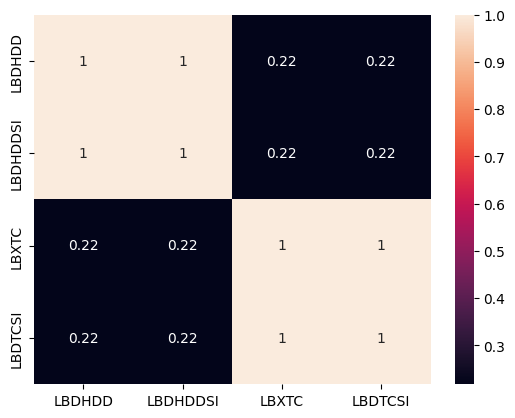

In [36]:
sns.heatmap(lab_data_chol.corr(),annot=True)

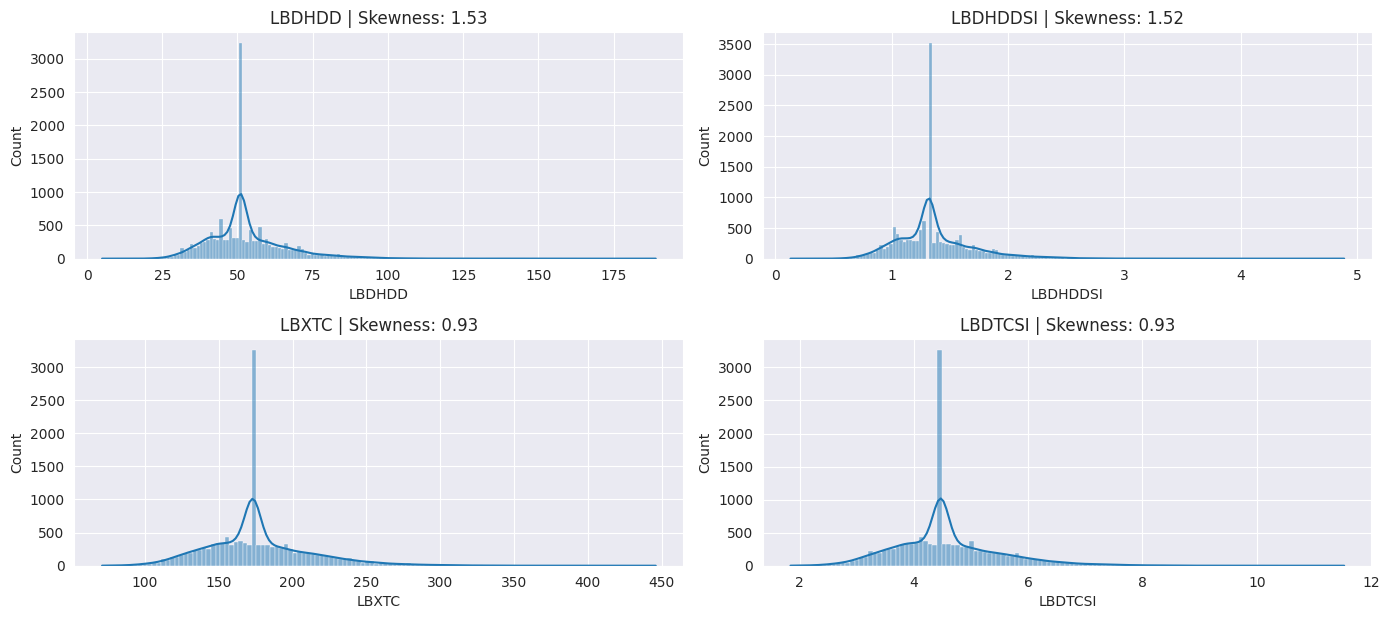

In [37]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = lab_data_chol.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(lab_data_chol[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(lab_data_chol[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

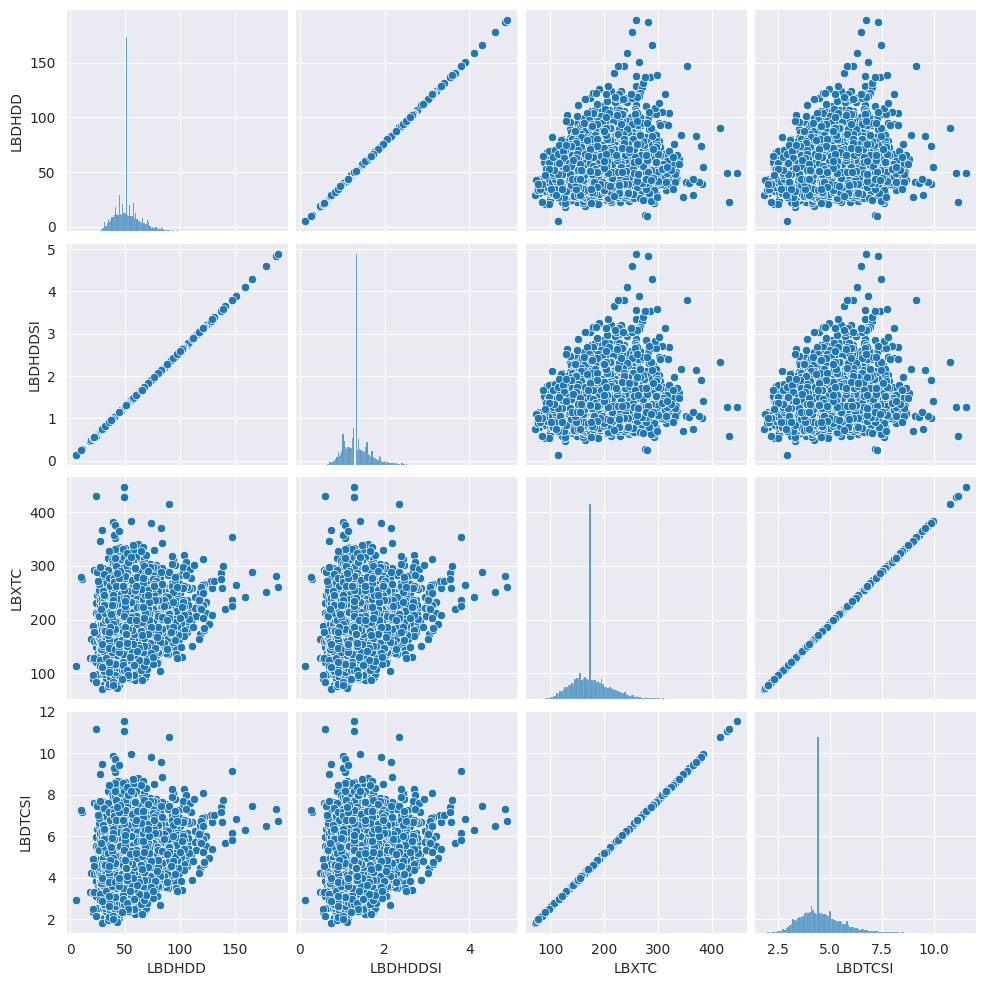

In [38]:
sns.pairplot(lab_data_chol)

<Axes: xlabel='LBDHDD', ylabel='LBDHDDSI'>

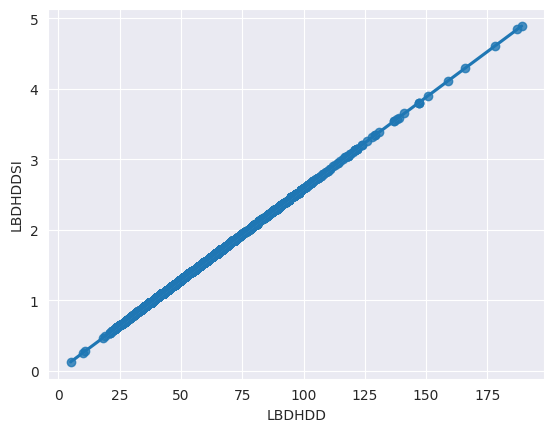

In [39]:
sns.regplot(x='LBDHDD',y='LBDHDDSI',data=lab_data_chol)

<Axes: xlabel='LBXTC', ylabel='LBDTCSI'>

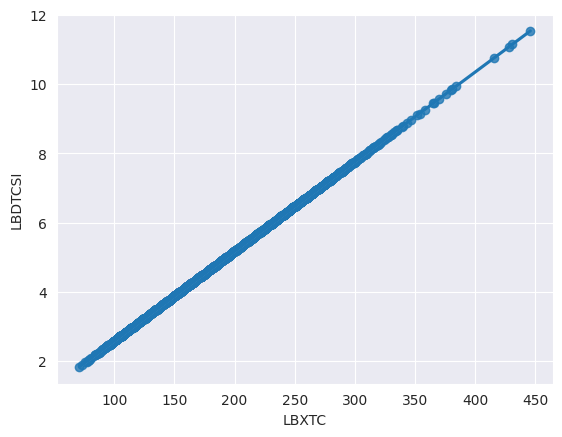

In [40]:
sns.regplot(x='LBXTC',y='LBDTCSI',data=lab_data_chol)

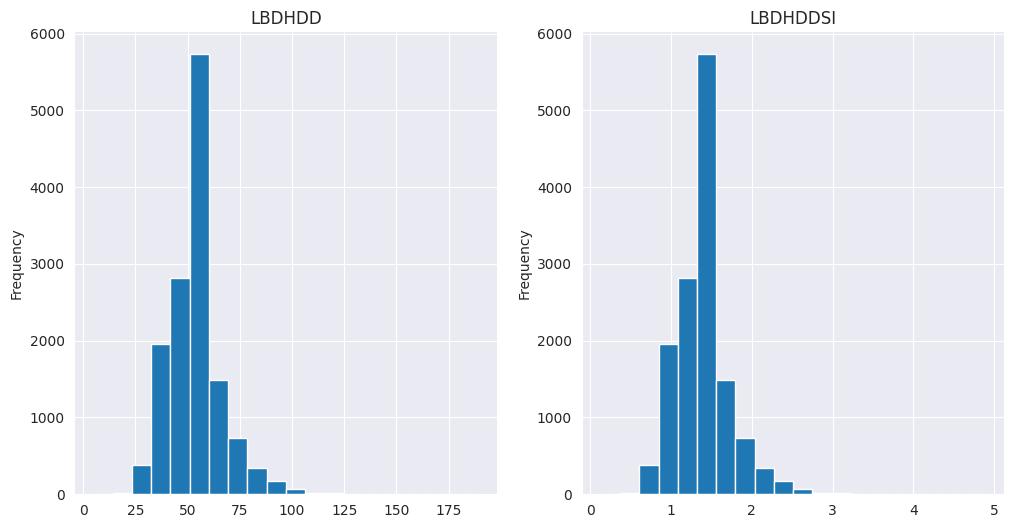

In [41]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))
lab_data_chol['LBDHDD'].plot(kind='hist', bins=20, title='LBDHDD', ax=axes[0])
axes[0].spines[['top', 'right']].set_visible(False)

lab_data_chol['LBDHDDSI'].plot(kind='hist', bins=20, title='LBDHDDSI', ax=axes[1])
axes[1].spines[['top', 'right']].set_visible(False)

plt.show()

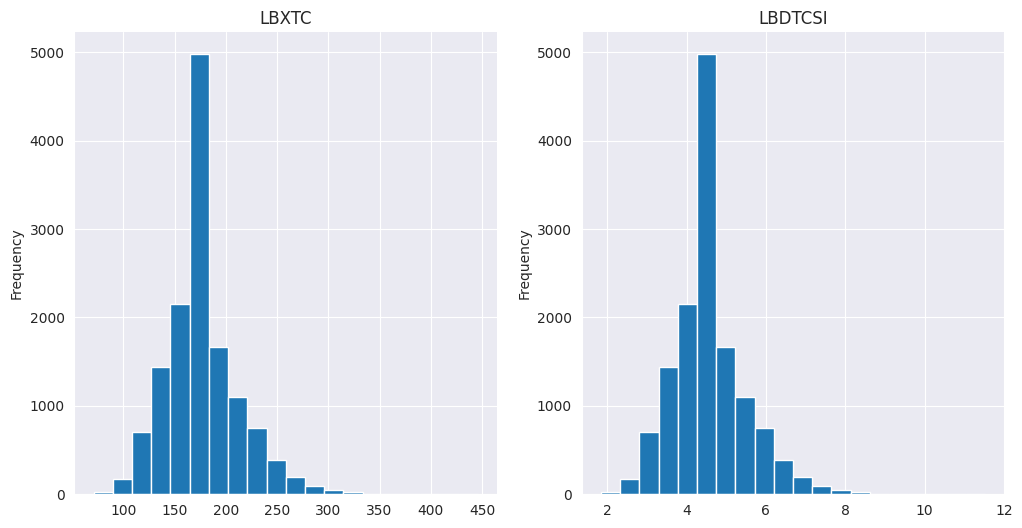

In [42]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))
lab_data_chol['LBXTC'].plot(kind='hist', bins=20, title='LBXTC', ax=axes[0])
axes[0].spines[['top', 'right']].set_visible(False)

lab_data_chol['LBDTCSI'].plot(kind='hist', bins=20, title='LBDTCSI', ax=axes[1])
axes[1].spines[['top', 'right']].set_visible(False)

plt.show()

In [43]:
lab_data_dropped_new_dup.to_csv('Merged_labpratory_data.csv')

In [44]:
lab_data_chol.to_csv('lab_chol.csv')